# Grid

First you have to import the meteomatics module and the datetime module

In [348]:
import datetime as dt
import meteomatics.api as api

from __future__ import print_function

In [349]:
# Opening JSON file with my credentials
import json

creds = open('mycredentials.json')
creds = json.load(creds)
username = creds["username"]
password = creds["password"]

Input here the date and the time.

Spezieller Tag mit Föhn am morgen und Wechsel auf West, ohne dass der Wind zur Wetterstation Quinten vorgedrungen ist: 20.10

In [350]:
startdate_grid = dt.datetime.utcnow().replace(day=20, month=10, hour=11, minute=0, second=0, microsecond=0)

In [351]:
res_lat = 0.002
res_lon = 0.002

Choose the parameter you want to get. You can only chose one parameter at a time. Check here which parameters are available: https://www.meteomatics.com/en/api/available-parameters/

In [352]:
parameter_grid ='wind_dir_2m:d'

Input here the limiting coordinates of the extract you want to look at. You can also change the resolution.

In [353]:
import numpy as np

In [354]:
lat_N, lon_W   = np.round([47.14986399112753, 9.089437360541716],5)
lat_S, lon_E = np.round([47.10316705595262, 9.312452613097536],5)

In the following, the request will start. If there is an error in the request as for example a wrong parameter or a date that doesn't exist, you get a message.

In [355]:
model="Mix"

In [356]:
print("grid:")
try:
    df_grid = api.query_grid(startdate=startdate_grid, parameter_grid=parameter_grid, lat_N=lat_N, lon_W=lon_W, lat_S=lat_S, lon_E=lon_E, res_lat=res_lat, res_lon=res_lon,
                             username=username, password=password, model=model)
    print (df_grid.head())
except Exception as e:
    print("Failed, the exception is {}".format(e))

grid:
lon       9.08944  9.09144  9.09344  9.09544  9.09744  9.09944  9.10144  \
lat                                                                       
47.14917     88.6     87.1     87.5     88.2     90.7    245.6    248.8   
47.14717     94.4     95.7     99.8    108.4    134.2    204.7    227.9   
47.14517    103.6    107.0    115.6    131.8    162.2    199.4    217.1   
47.14317    114.6    121.0    133.4    151.9    175.3    197.4    210.9   
47.14117    128.3    136.7    150.2    166.0    182.2    196.4    207.0   

lon       9.10344  9.10544  9.10744  ...  9.29344  9.29544  9.29744  9.29944  \
lat                                  ...                                       
47.14917    245.3    243.9    243.1  ...    181.6    173.5    165.7    158.3   
47.14717    233.4    236.1    237.7  ...    191.8    184.0    175.8    167.5   
47.14517    225.1    229.9    233.1  ...    204.2    197.7    190.3    182.0   
47.14317    219.2    225.0    229.2  ...    218.3    214.4    209.6 

In [357]:
df_grid.head()

lon,9.08944,9.09144,9.09344,9.09544,9.09744,9.09944,9.10144,9.10344,9.10544,9.10744,...,9.29344,9.29544,9.29744,9.29944,9.30144,9.30344,9.30544,9.30744,9.30944,9.31144
lat,,,,,,,,,,,,,,,,,,,,,
47.14917,88.6,87.1,87.5,88.2,90.7,245.6,248.8,245.3,243.9,243.1,...,181.6,173.5,165.7,158.3,152.5,147.2,141.7,132.7,133.2,129.8
47.14717,94.4,95.7,99.8,108.4,134.2,204.7,227.9,233.4,236.1,237.7,...,191.8,184.0,175.8,167.5,161.5,156.3,151.2,145.5,141.3,138.4
47.14517,103.6,107.0,115.6,131.8,162.2,199.4,217.1,225.1,229.9,233.1,...,204.2,197.7,190.3,182.0,176.6,172.1,164.9,161.8,157.7,156.5
47.14317,114.6,121.0,133.4,151.9,175.3,197.4,210.9,219.2,225.0,229.2,...,218.3,214.4,209.6,203.6,200.6,199.0,190.9,190.0,192.8,195.9
47.14117,128.3,136.7,150.2,166.0,182.2,196.4,207.0,214.9,221.0,225.8,...,232.5,231.7,230.6,229.3,229.9,231.2,234.1,234.1,235.7,238.2


In [358]:
import matplotlib.pyplot as plt

In [359]:
longs = df_grid.columns.to_list()
lats = df_grid.index.to_list()

In [360]:
-np.sin(np.deg2rad(90))
-np.cos(np.deg2rad(180))

1.0

In [361]:
x = longs
y = lats

X, Y = np.meshgrid(x, y)
u = -np.sin(np.deg2rad(df_grid))
v = -np.cos(np.deg2rad(df_grid))

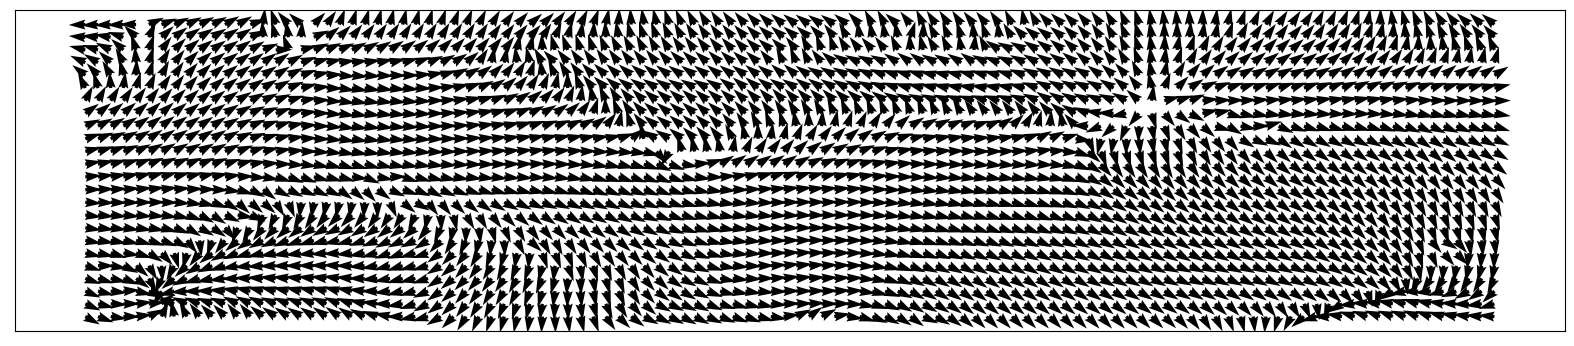

In [362]:
fig, ax = plt.subplots(figsize=(20,7))
ax.quiver(X,Y,u,v)

ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.set_aspect('equal')

plt.show()

# Add wind speed

In [363]:
parameter_grid = "wind_speed_10m:kmh"

In [364]:
print("speed:")
try:
    df_grid_speed = api.query_grid(startdate=startdate_grid, parameter_grid=parameter_grid, lat_N=lat_N, lon_W=lon_W, lat_S=lat_S, lon_E=lon_E, res_lat=res_lat, res_lon=res_lon,
                             username=username, password=password)
    print (df_grid_speed.head())
except Exception as e:
    print("Failed, the exception is {}".format(e))

speed:
lon       9.08944  9.09144  9.09344  9.09544  9.09744  9.09944  9.10144  \
lat                                                                       
47.14917      3.5      2.7      2.0      1.3      0.6      0.1      0.7   
47.14717      3.1      2.4      1.8      1.1      0.6      0.5      1.0   
47.14517      2.6      2.1      1.6      1.1      0.9      1.0      1.3   
47.14317      2.3      1.9      1.6      1.3      1.2      1.4      1.7   
47.14117      2.1      1.9      1.7      1.6      1.6      1.8      2.1   

lon       9.10344  9.10544  9.10744  ...  9.29344  9.29544  9.29744  9.29944  \
lat                                  ...                                       
47.14917      1.2      1.7      2.2  ...      4.1      4.2      4.2      4.4   
47.14717      1.4      1.9      2.4  ...      3.7      3.6      3.5      3.5   
47.14517      1.7      2.1      2.6  ...      3.4      3.2      3.0      2.8   
47.14317      2.0      2.4      2.8  ...      3.3      3.0      2.7

In [365]:
u_speed = u * df_grid_speed
v_speed = v * df_grid_speed

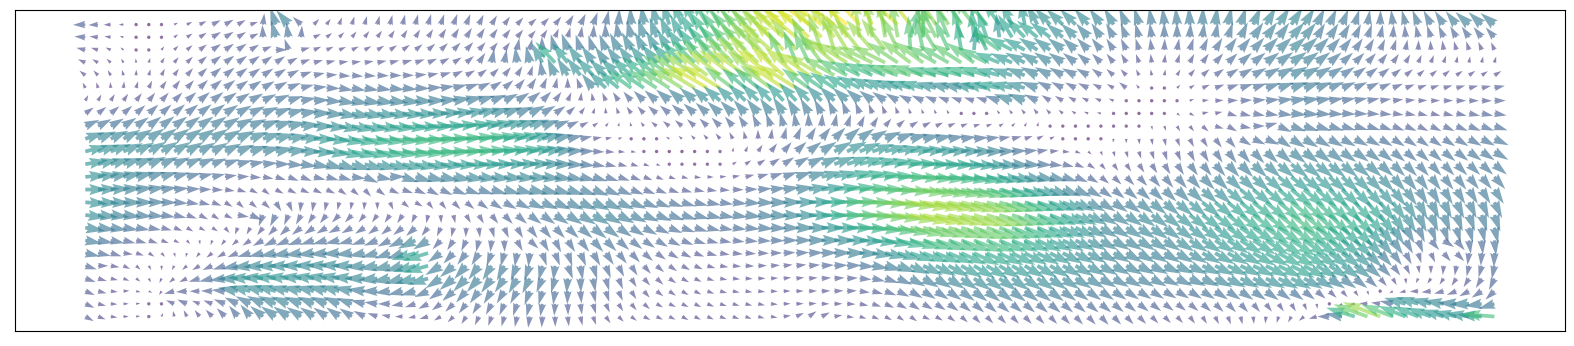

In [366]:
fig, ax = plt.subplots(figsize=(20,7))
ax.quiver(X,Y,u_speed,v_speed,df_grid_speed,alpha=0.6)

ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.set_aspect('equal')

# Add quiver with station value

In [367]:
wmo_id = ["066870"]
X_station = 9.21605
Y_station = 47.1287

model_station_ts = 'mix-obs'
parameters_station_ts = ['wind_dir_10m:d', 'wind_speed_10m:kmh']

In [368]:
print("station coordinates timeseries:")
try:
    df_sd_coord = api.query_station_timeseries(startdate_grid, startdate_grid + dt.timedelta(hours=1), dt.timedelta(minutes=10),
                                               parameters_station_ts, username, password, model=model_station_ts,
                                               wmo_ids=wmo_id, on_invalid='fill_with_invalid', #latlon_tuple_list=coordinates_station_ts, 
                                               request_type="POST", temporal_interpolation='none')
    print(df_sd_coord.head())
except Exception as e:
    print("Failed, the exception is {}".format(e))

station coordinates timeseries:
                                      wind_dir_10m:d  wind_speed_10m:kmh
station_id validdate                                                    
wmo_066870 2022-10-20 11:00:00+00:00           258.0                11.9
           2022-10-20 11:10:00+00:00           265.0                12.2
           2022-10-20 11:20:00+00:00           254.0                 8.6
           2022-10-20 11:30:00+00:00           264.0                 9.0
           2022-10-20 11:40:00+00:00           252.0                 6.1


In [369]:
speed_station = df_sd_coord.iloc[0,1]
u_speed_station = -np.sin(np.deg2rad(df_sd_coord.iloc[0,0])) * speed_station
v_speed_station = -np.cos(np.deg2rad(df_sd_coord.iloc[0,0])) * speed_station

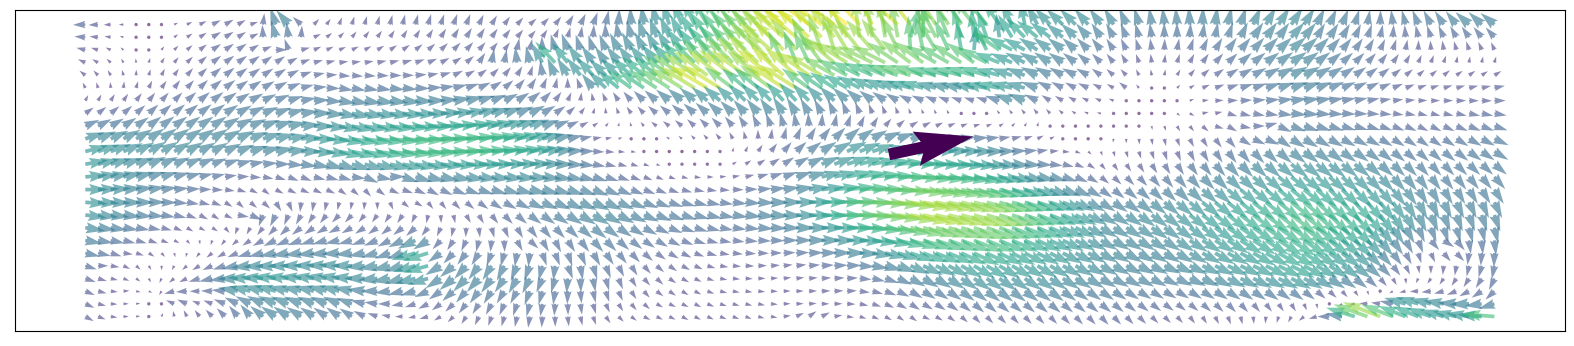

In [371]:
fig, ax = plt.subplots(figsize=(20,7))
ax.quiver(X,Y,u_speed,v_speed,df_grid_speed,alpha=0.6)
ax.quiver(X_station,Y_station,u_speed_station,v_speed_station,speed_station)
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.set_aspect('equal')
plt.show()